In [1]:
import numpy as np
import matplotlib.pyplot as plt

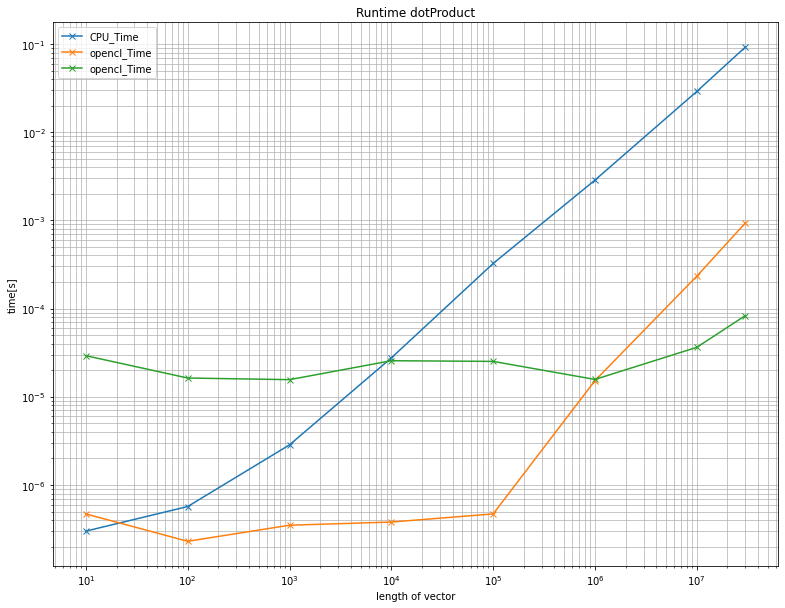

In [2]:
N = [10,100, 1000, 10000, 100000, 1000000, 10000000, 30000000]
CPU_time = [3e-07, 5.7e-07, 2.85e-06, 2.759e-05, 0.00032447, 0.00286088, 0.0289263, 0.0921195]
opencl_time = [4.7e-07,2.3e-07, 3.5e-07, 3.8e-07, 4.7e-07, 1.523e-05, 0.00023278, 0.00093314]
GPU_time = [2.922e-05, 1.632e-05, 1.564e-05, 2.564e-05, 2.519e-05, 1.573e-05, 3.635e-05,8.328e-05]
factor_CPU_opencl = [0.638298, 2.47826, 8.14286, 72.6053, 690.362, 187.845, 124.265, 98.7199]
factor_CPU_GPU = [0.00773196, 0.0181319, 0.0954561, 1.11926, 10.0644, 171.597, 842.527, 1095.57]

plt.figure(figsize=(13,10))
plt.loglog(N,CPU_time, label = "CPU_Time", marker='x')
plt.loglog(N,opencl_time, label = "opencl_Time", marker='x')
plt.loglog(N,GPU_time, label = "opencl_Time", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Runtime dotProduct")
plt.xlabel("length of vector")
plt.ylabel("time[s]")
plt.savefig("Bilder/Runtime_dotProduct")

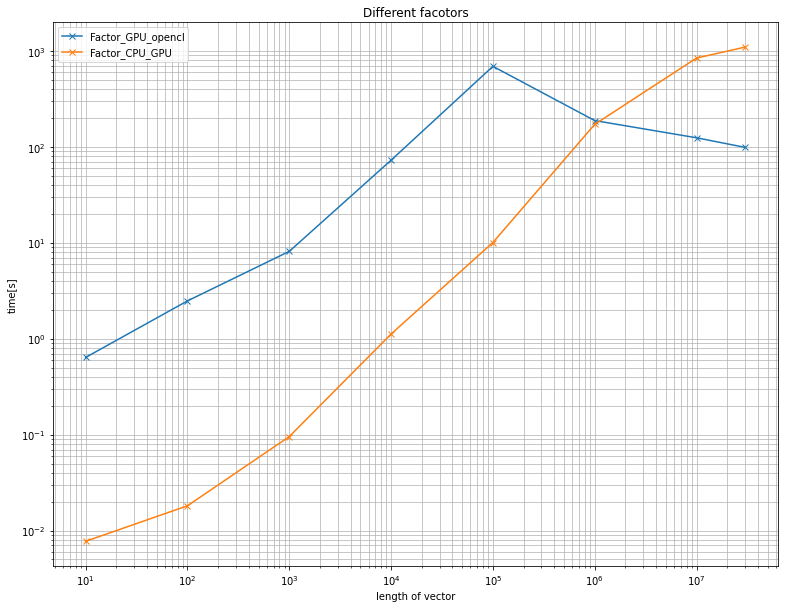

In [3]:
plt.figure(figsize=(13,10))
plt.loglog(N,factor_CPU_opencl, label = "Factor_GPU_opencl", marker='x')
plt.loglog(N,factor_CPU_GPU, label = "Factor_CPU_GPU", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Different facotors")
plt.xlabel("length of vector")
plt.ylabel("time[s]")
plt.savefig("Bilder/diff_factor")

In [4]:
M = [1,10,30,50,80,100]
time_diff_kernel = [0.031727, 0.032712, 0.034467]

In [27]:
import pandas as pd

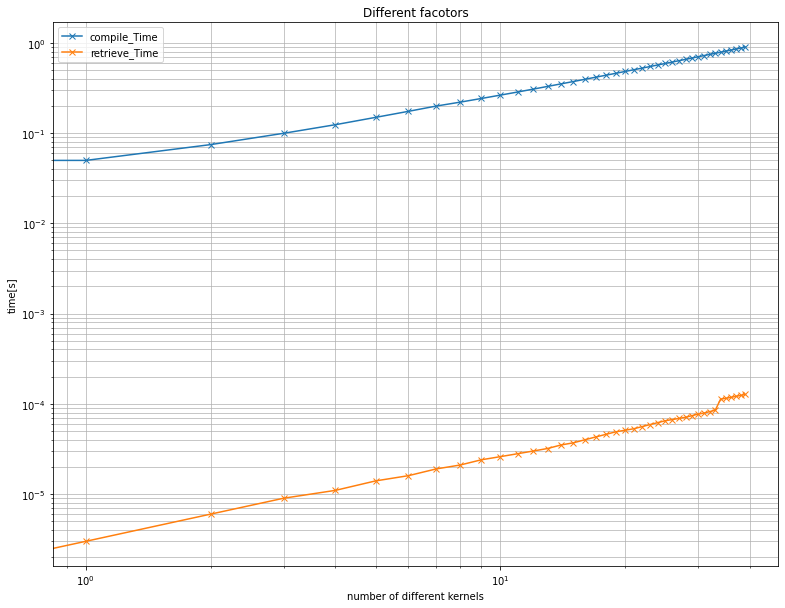

In [35]:
df_raw = pd.read_csv("csv_diffKernels.csv",sep = ";")
othertimes = []
cleantimes = []
othertimes = df_raw["retrieve_Time"] - df_raw["compile_Time"]
for i in range(len(df_raw["M"])):
    cleantimes.append(np.sum(othertimes[0:i]))
plt.figure(figsize=(13,10))
plt.loglog(df_raw["M"],df_raw["compile_Time"], label = "compile_Time", marker='x')
plt.loglog(df_raw["M"],cleantimes, label = "retrieve_Time", marker='x')
plt.legend()
plt.grid(True, which="both",linewidth=0.7)
plt.title("Different facotors")
plt.xlabel("number of different kernels")
plt.ylabel("time[s]")
plt.savefig("Bilder/Time_to_compile_and_clean")

In [25]:
othertimes[0:2]

6.000000000002531e-06

In [26]:
cleantimes

[0.0,
 2.999999999999531e-06,
 6.000000000002531e-06,
 9.000000000005531e-06,
 1.1000000000007532e-05,
 1.4000000000010532e-05,
 1.5999999999984776e-05,
 1.8999999999987777e-05,
 2.0999999999989777e-05,
 2.399999999996502e-05,
 2.5999999999967022e-05,
 2.7999999999969022e-05,
 2.9999999999971022e-05,
 3.199999999997302e-05,
 3.499999999994827e-05,
 3.699999999995027e-05,
 3.999999999992551e-05,
 4.2999999999900756e-05,
 4.5999999999876e-05,
 4.8999999999851246e-05,
 5.099999999990876e-05,
 5.299999999991076e-05,
 5.5999999999886e-05,
 5.899999999986125e-05,
 6.199999999983649e-05,
 6.499999999992276e-05,
 6.699999999998027e-05,
 6.900000000003778e-05,
 7.100000000009529e-05,
 7.400000000007054e-05,
 7.70000000001568e-05,
 7.900000000021432e-05,
 8.200000000018956e-05,
 8.500000000027583e-05,
 0.00011300000000019281,
 0.00011500000000025032,
 0.00011800000000033659,
 0.00012100000000020081,
 0.00012400000000028708,
 0.00012700000000037334]